# Pokemon Type 1 Classification Neural Network

# Data Import

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib
import numpy as np

2024-05-06 19:47:19.861489: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 19:47:19.862358: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 19:47:19.866578: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 19:47:19.928482: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 19:47:20.990940: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


# Data Preparation

In [2]:

df = pd.read_csv('Pokemon.csv')

# Step 1: Select relevant columns
X = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','legendary']]
X_with_legendary_int = X.copy()
X_with_legendary_int['legendary_int'] = X['legendary'].astype(int)
X = X_with_legendary_int.drop(['legendary'], axis=1)



# One hot encoding for the types
df_encoded = pd.get_dummies(df, columns=['type1'])
df_encoded.fillna(0, inplace=True)
df_encoded.head()
y = df_encoded.drop(['number', 'name', 'total', 'generation','hp','attack','defense','sp_attack', 'sp_defense','speed','legendary','type2'], axis=1)

In [3]:
X.head()

,hp,attack,defense,sp_attack,sp_defense,speed,legendary_int
0,45,49,49,65,65,45,0
1,60,62,63,80,80,60,0
2,80,82,83,100,100,80,0
3,80,100,123,122,120,80,0
4,80,82,83,100,100,80,0


In [4]:
y.head()

,type1_Bug,type1_Dark,type1_Dragon,type1_Electric,type1_Fairy,type1_Fighting,type1_Fire,type1_Flying,type1_Ghost,type1_Grass,type1_Ground,type1_Ice,type1_Normal,type1_Poison,type1_Psychic,type1_Rock,type1_Steel,type1_Water
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [5]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Defining the Neural Network

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Define the model
model = Sequential([
    Input(shape=(7,)),
    
    layers.Dense(49, activation='relu'),
    layers.Dense(49, activation='relu'),

    layers.Dense(18, activation='softmax')
])

# Compile the model
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 49)             │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 49)             │         2,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 18)             │           900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742 (14.62 KB)

 Trainable params: 3,742 (14.62 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model.fit(
    X_train, y_train,
    epochs=50,     
    batch_size=64, 
    validation_data=(X_test, y_test)
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0721 - loss: 2.9202 - val_accuracy: 0.1163 - val_loss: 2.8486
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1198 - loss: 2.8416 - val_accuracy: 0.1488 - val_loss: 2.7961
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1856 - loss: 2.7583 - val_accuracy: 0.1395 - val_loss: 2.7538
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1905 - loss: 2.7083 - val_accuracy: 0.1488 - val_loss: 2.7220
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1931 - loss: 2.6819 - val_accuracy: 0.1395 - val_loss: 2.6937
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1923 - loss: 2.6479 - val_accuracy: 0.1256 - val_loss: 2.6733
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2007 - loss: 2.6390 - val_accuracy: 0.1581 - val_loss: 2.6562
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1924 - loss: 2.5900 - val_accuracy: 0.1535 - val_loss

<Axes: title={'center': 'Categorical Accuracy'}>

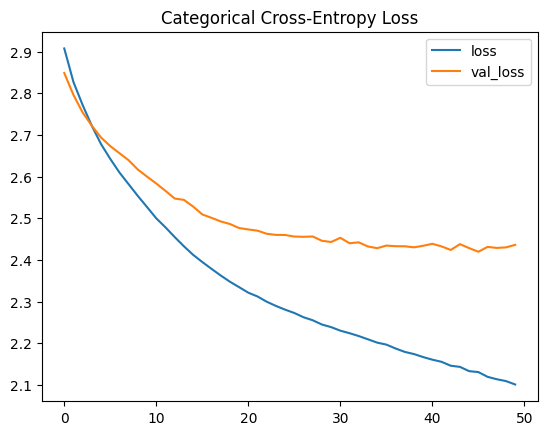

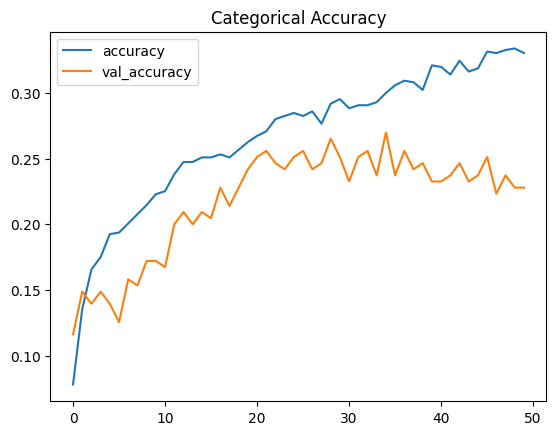

In [90]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Categorical Cross-Entropy Loss")

history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Categorical Accuracy")


# Make Predictions

In [14]:
types_array = ['Bug', 'Dark', 'Dragon','Electric','Fairy','Fighting','Fire','Flying','Ghost','Grass','Ground','Ice','Normal','Poison','Psychic','Rock','Steel','Water']

In [91]:
bulbasaur = np.array([45,49,49,65,65,45, 0])
kangaskhan = np.array([105, 95, 80, 40, 80, 90, 0])

suicune = np.array([100, 75, 115, 90, 115, 85, 1])
zapdos = np.array([90,90,85,125,90,100, 1])

# Combine the stats into a single array
pokemon_data = np.array([bulbasaur, kangaskhan, suicune, zapdos])

# Scale the data using the same scaler used during training
scaled_pokemon_data = scaler.transform(pokemon_data)  # Reusing the 'scaler' object

# Make predictions on the scaled data
predictions = model.predict(scaled_pokemon_data)

pokemon_names = ['Bulbasaur', 'Kangaskhan', 'Suicune', 'Zapdos']

max_indices = np.argmax(predictions, axis=1)

# Map the indices to the corresponding types
predicted_types = [types_array[i] for i in max_indices]

# Print the predicted types
print(predicted_types)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
['Grass', 'Normal', 'Psychic', 'Psychic']


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
lechonk = np.array([54,45,40,35,45,35,0])
oinkologne = np.array([110, 100, 75, 59, 80, 65,0])
skeledirge = np.array([104, 75, 100, 110, 75, 66,0])


chiyu = np.array([55,80,80,145,120,100,1])
koraidon = np.array([100, 135,115, 85, 110, 135,1])
wochien = np.array([85,90,100,100,135,75,1])

pokemon_test_data = np.array([lechonk, oinkologne, skeledirge, chiyu, koraidon, wochien])
scaled_pokemon_test_data = scaler.transform(pokemon_test_data)
predictions = model.predict(scaled_pokemon_test_data)

max_indices = np.argmax(predictions, axis=1)

# Map the indices to the corresponding types
predicted_types = [types_array[i] for i in max_indices]

# Print the predicted types
print(predicted_types)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
['Normal', 'Normal', 'Water', 'Psychic', 'Fighting', 'Psychic']


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
